# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [3]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df_ai = pd.read_excel('/content/ieee-chatgpt-generation.xlsx')
df_ai['is_human'] = 0  # Add a new column 'is_human' to the DataFrame and set its value to 0, indicating AI-generated text.

df_hu = pd.read_excel('/content/ieee-init.xlsx')
df_hu['is_human'] = 1  # Add a new column 'is_human' to the DataFrame and set its value to 1, indicating human-written text.

# Number of samples
num_samples_Ai = df_ai.shape[0]
num_samples_Hu = df_hu.shape[0]

# Number of features
num_features_Ai = df_ai.shape[1]
num_features_Hu = df_hu.shape[1]


# Display these dataset characteristics
print(f"*AI-generated text*")
print(f"Number of samples: {num_samples_Ai}")
print(f"Number of features: {num_features_Ai}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df_ai.head())

# Display these dataset characteristics
print(f"*Human-written text*")
print(f"Number of samples: {num_samples_Hu}")
print(f"Number of features: {num_features_Hu}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df_hu.head())



*AI-generated text*
Number of samples: 15395
Number of features: 7
Example data:
   Unnamed: 0.1  Unnamed: 0       id  \
0             0           0  8600003   
1             1           1  8600004   
2             2           2  8600008   
3             3           3  8600013   
4             4           4  8600014   

                                               title  \
0  An Improved Variable-Node-Based BP Decoding Al...   
1  Mobile Robot Location Algorithm Based on Impro...   
2  Vertical Handoff Decision Algorithm for Hetero...   
3  Robust offline trained neural network for TDOA...   
4  Gaussian MAC with Feedback and Strictly Causal...   

                                             keyword  \
0  "Flash memories","Reliability","Decoding","Par...   
1  "Sociology","Statistics","Simultaneous localiz...   
2  "Entropy","Handover","Wireless networks","Deci...   
3  "Microphones","Artificial neural networks","Po...   
4  "Encoding","Transmitters","Decoding","Indexes"...   

    

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [6]:
# Check for missing values
# Check for missing values
print("\nMissing values in AI Generated Text Dataset:")
print(df_ai.isnull().sum())

print("\nMissing values in Human Written Text Dataset:")
print(df_hu.isnull().sum())



Missing values in AI Generated Text Dataset:
Unnamed: 0.1    0
Unnamed: 0      0
id              0
title           0
keyword         0
abstract        0
is_human        0
dtype: int64

Missing values in Human Written Text Dataset:
id          0
title       0
keyword     0
abstract    0
is_human    0
dtype: int64


In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here
# No missing value are found in our dataset

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


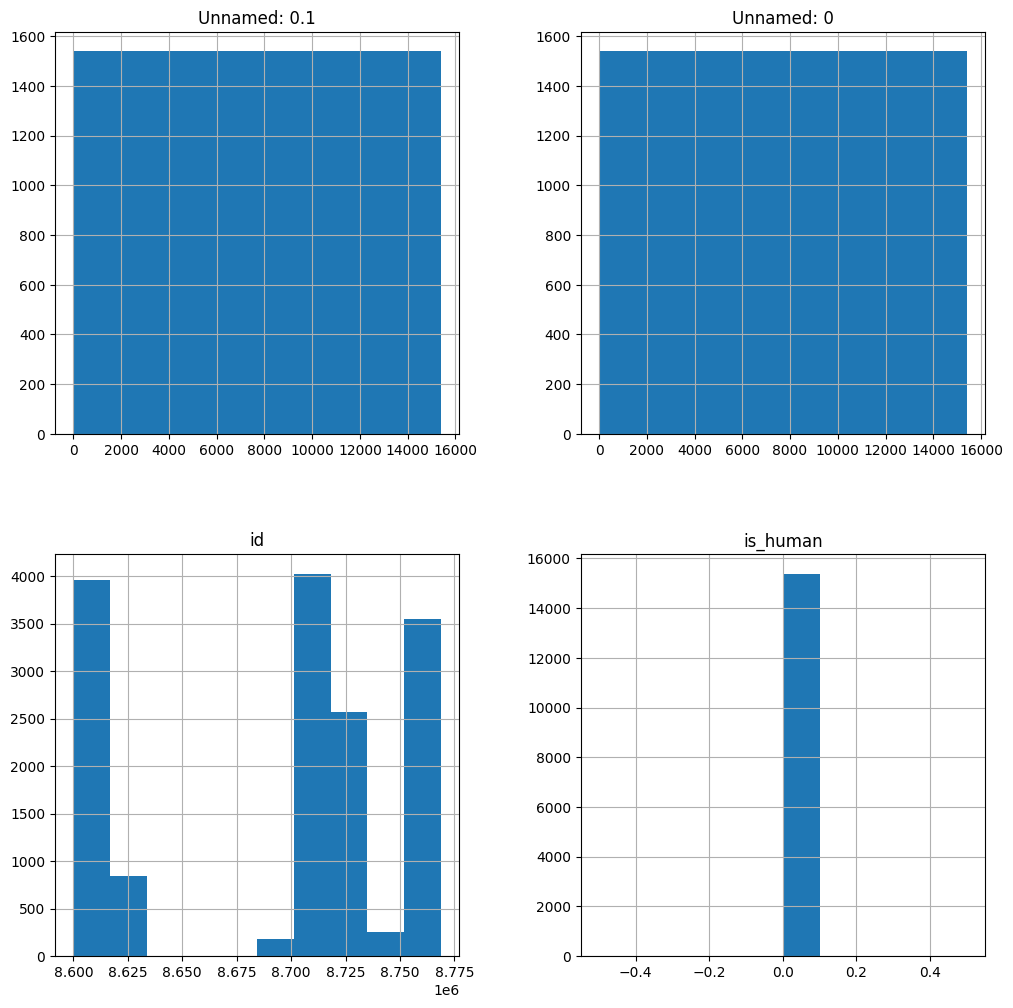

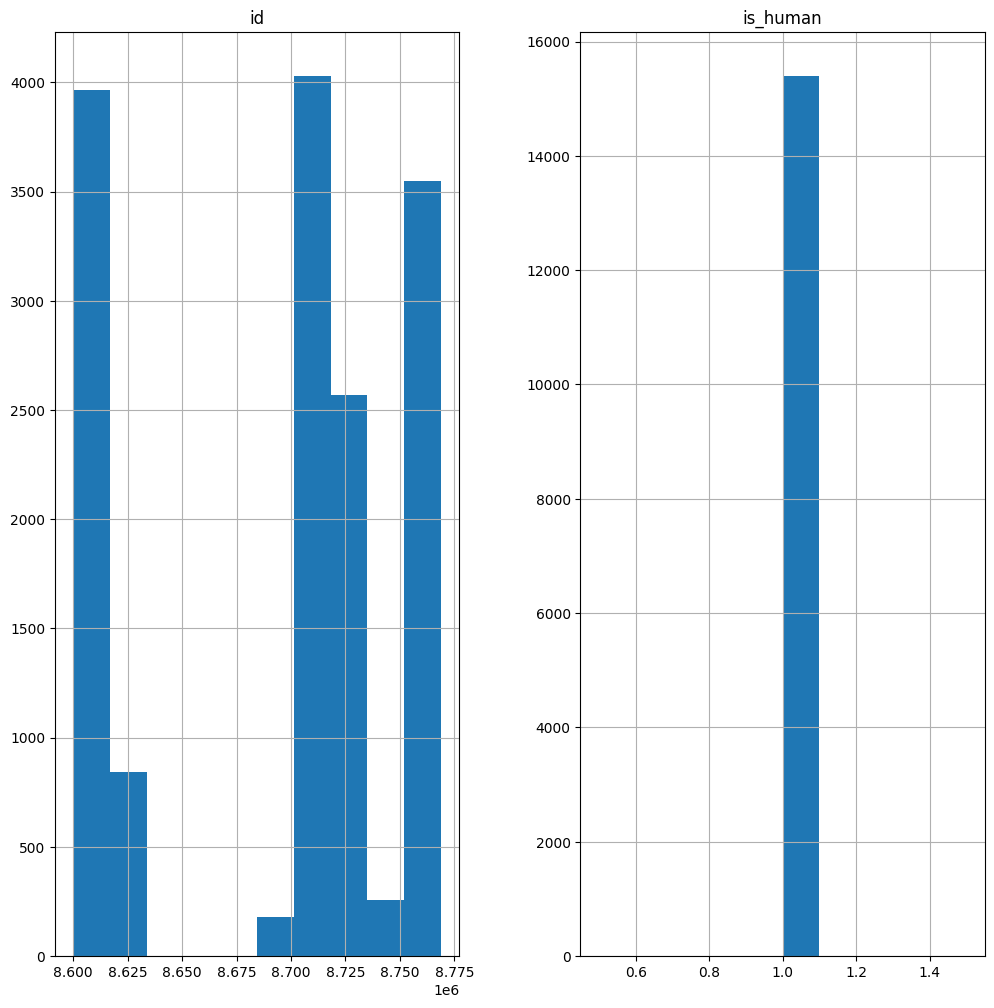

In [ ]:
import matplotlib.pyplot as plt
# Example: Plotting histograms of all numerical features
df_ai.hist(figsize=(12, 12))
plt.show()

df_hu.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]



Duplicate entries in AI Generated Text Dataset:
0

Duplicate entries in Human Written Text Dataset:
0


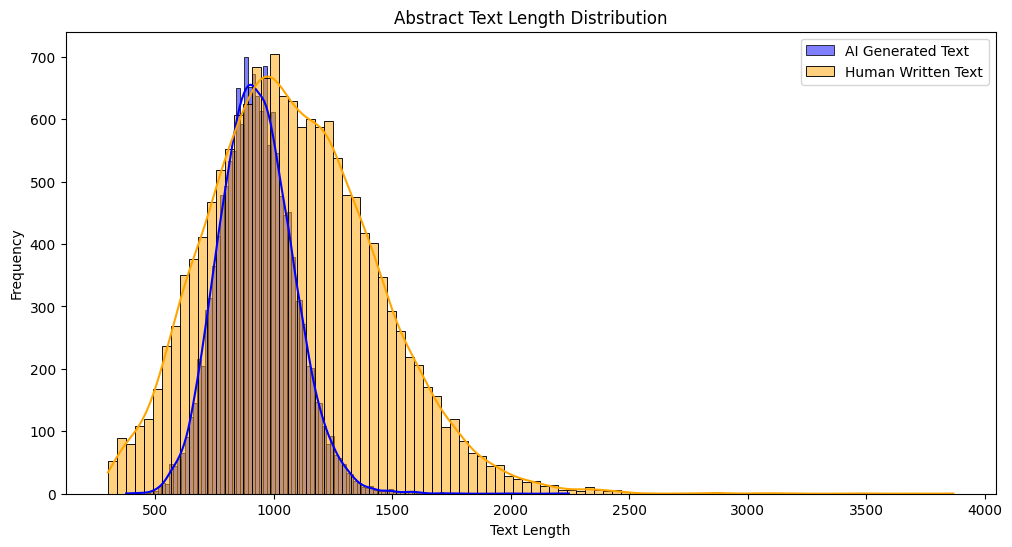


Missing values in AI Generated Text Dataset:
Unnamed: 0.1    0
Unnamed: 0      0
id              0
title           0
keyword         0
abstract        0
is_human        0
text_length     0
dtype: int64

Missing values in Human Written Text Dataset:
id             0
title          0
keyword        0
abstract       0
is_human       0
text_length    0
dtype: int64

Top 10 keywords in AI Generated Text Dataset:
keyword
"Internet of Things","Green computing","Social computing","Blockchain","Information technology"                                                      6
"Iron","Frequency modulation","IP networks"                                                                                                          4
"Handheld computers","Internet of Things","Green computing","Social computing","Blockchain","Information technology"                                 3
"Conferences","Artificial intelligence","Virtual reality"                                                                      

In [14]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for duplicate entries
print("\nDuplicate entries in AI Generated Text Dataset:")
print(df_ai.duplicated().sum())

print("\nDuplicate entries in Human Written Text Dataset:")
print(df_hu.duplicated().sum())

# Investigate text length distributions
if 'abstract' in df_ai.columns and 'abstract' in df_hu.columns:
    df_ai['text_length'] = df_ai['abstract'].apply(len)
    df_hu['text_length'] = df_hu['abstract'].apply(len)

    plt.figure(figsize=(12, 6))
    sns.histplot(df_ai['text_length'], color='blue', label='AI Generated Text', kde=True)
    sns.histplot(df_hu['text_length'], color='orange', label='Human Written Text', kde=True)
    plt.legend()
    plt.title('Abstract Text Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\nNo 'abstract' column found in one or both datasets to analyze text length distribution.")

# Check for missing values
print("\nMissing values in AI Generated Text Dataset:")
print(df_ai.isnull().sum())

print("\nMissing values in Human Written Text Dataset:")
print(df_hu.isnull().sum())

# Investigate keyword diversity
if 'keyword' in df_ai.columns and 'keyword' in df_hu.columns:
    ai_keywords = df_ai['keyword'].str.split(';').explode().value_counts()
    hu_keywords = df_hu['keyword'].str.split(';').explode().value_counts()

    print("\nTop 10 keywords in AI Generated Text Dataset:")
    print(ai_keywords.head(10))

    print("\nTop 10 keywords in Human Written Text Dataset:")
    print(hu_keywords.head(10))

    # Keyword diversity comparison
    unique_ai_keywords = ai_keywords.index.nunique()
    unique_hu_keywords = hu_keywords.index.nunique()

    print(f"\nUnique keywords in AI Generated Text Dataset: {unique_ai_keywords}")
    print(f"Unique keywords in Human Written Text Dataset: {unique_hu_keywords}")
else:
    print("\nNo 'keyword' column found in one or both datasets to analyze keyword diversity.")

# Check for ID uniqueness
print("\nID uniqueness in AI Generated Text Dataset:")
print(df_ai['id'].is_unique)

print("\nID uniqueness in Human Written Text Dataset:")
print(df_hu['id'].is_unique)




## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


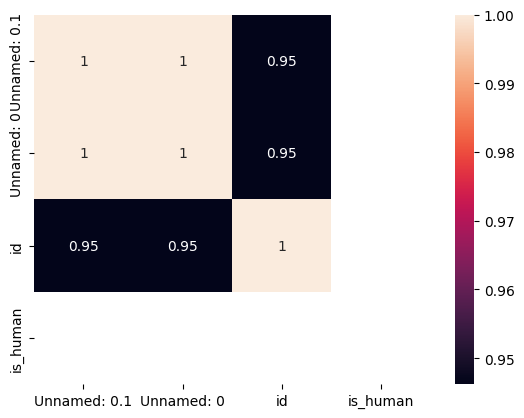

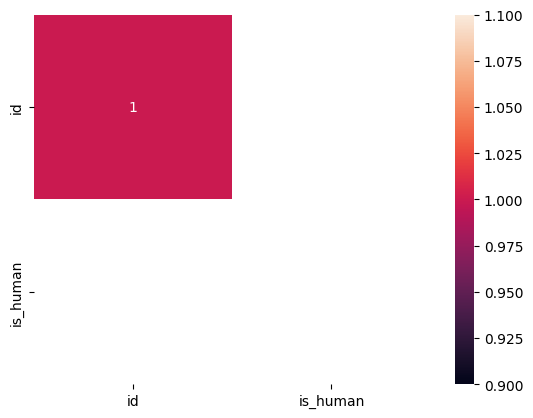

In [ ]:
# Example: Plotting a heatmap to show feature correlations
# Select only numerical features for correlation calculation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df_ai.select_dtypes(include=np.number).columns
correlation_matrix = df_ai[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

numerical_features = df_hu.select_dtypes(include=np.number).columns
correlation_matrix = df_hu[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()




